<a href="https://colab.research.google.com/github/Sourabhpatel1/Capstone-Project-EDA-AlmaBatter/blob/main/EDA_on_Telecom_Churn_Dataset(Capstone_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><u>AlmaBetter Capstone Project EDA on Telecom Churn Dataset</u></b></h1>
<h3> This notebook contains all the code for exploratory data analysis on the Telecom Churn Datatset for Capstone Project-1</h3>



*   The dataset pertains to the the Orange S.A. telecom operator.
*   The porpose of this EDA is to identigy the major factors contributing to the customer churn and suggest ways/recommendations to ensure customer retention.
* Python and Pandas library is used in this project to perfom exploratory analysis on the dataset provided.
* Matplotlib and Seaborn are the libraries used for plotting and visualizing the data.
* The objective of this notebook is to ascertain the primary factors causing customer churn by using numerical and graphical analysis on the Orange S.A.'s dataset. 





In [1]:
# Importing all the neccessary libraries for EDA on the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
# Setting all the formatting and dispaly parameters for data visualization and plotting.
%matplotlib inline
#define Seaborn color palette to use
colors = sns.color_palette('muted')
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
# Setting pd option for displaying floats instead of scientific notation in dataset

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# loading data

churn_data = pd.read_csv("/content/drive/MyDrive/Copy of Telecom Churn.csv")

In [6]:
# checking the head of the dataset

churn_data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.10000,110,45.07000,197.40000,99,16.78000,244.70000,91,11.01000,10.00000,3,2.70000,1,False
1,OH,107,415,No,Yes,26,161.60000,123,27.47000,195.50000,103,16.62000,254.40000,103,11.45000,13.70000,3,3.70000,1,False
2,NJ,137,415,No,No,0,243.40000,114,41.38000,121.20000,110,10.30000,162.60000,104,7.32000,12.20000,5,3.29000,0,False
3,OH,84,408,Yes,No,0,299.40000,71,50.90000,61.90000,88,5.26000,196.90000,89,8.86000,6.60000,7,1.78000,2,False
4,OK,75,415,Yes,No,0,166.70000,113,28.34000,148.30000,122,12.61000,186.90000,121,8.41000,10.10000,3,2.73000,3,False


In [7]:
# checking for null values and categorical, boolean and numerical columns

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Using the describe function to get a birds eye view of the dataset.

churn_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,101.06481,437.18242,8.09901,179.77510,100.43564,30.56231,200.98035,100.11431,17.08354,200.87204,100.10771,9.03932,10.23729,4.47945,2.76458,1.56286
std,39.82211,42.37129,13.68837,54.46739,20.06908,9.25943,50.71384,19.92263,4.31067,50.57385,19.56861,2.27587,2.79184,2.46121,0.75377,1.31549
min,1.00000,408.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,23.20000,33.00000,1.04000,0.00000,0.00000,0.00000,0.00000
25%,74.00000,408.00000,0.00000,143.70000,87.00000,24.43000,166.60000,87.00000,14.16000,167.00000,87.00000,7.52000,8.50000,3.00000,2.30000,1.00000
50%,101.00000,415.00000,0.00000,179.40000,101.00000,30.50000,201.40000,100.00000,17.12000,201.20000,100.00000,9.05000,10.30000,4.00000,2.78000,1.00000
75%,127.00000,510.00000,20.00000,216.40000,114.00000,36.79000,235.30000,114.00000,20.00000,235.30000,113.00000,10.59000,12.10000,6.00000,3.27000,2.00000
max,243.00000,510.00000,51.00000,350.80000,165.00000,59.64000,363.70000,170.00000,30.91000,395.00000,175.00000,17.77000,20.00000,20.00000,5.40000,9.00000


In [9]:
# getting a description of boolean and categorical columsn

churn_data.describe(include=["bool", "object"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


<h1>A brief description of the dataset</h1>
<ol>
  <li>There are total 20 columns in the dataset.</li>
  <li>There are 8 float + 8 integer, a total of 16 numerical columns.</li>
  <li>There are 3 categorical columns Inetrnational Plan, Voice mail plan and State.</li>
  <li>There is only one boolean column, Churn which is True if a subscriber has stopped using the service of the operator.</li>
  <li>There are no null values in the dataset.</li>
  <li> The length of the dataset is 3333, i.e . there are 3333 rows in the dataset.</li>
  <li>Area code, although a numerical column in the dataset, is a column or feature of a categoricl nature and therefore would be treated as such thorughout the EDA.</li>
  <li>Median and Mean of calls and charges in all three time divisions i.e. Day, Evening and Night is around 100 calls per subscriber suggesting that one time division is not preffered over the other by the subscribers.</li>
  <li>Also for International calls and charge the mean and median are near identical meaning that the data is uniformly distributed.</li>
  <li>The most number of subscribers are from "WV" state.</li>
</ol>

In [10]:
#finding out the churn rate

percent_churn = (churn_data["Churn"].value_counts()[True]/len(churn_data))*100

print(f"The rate of churn for the dataset period is {round(percent_churn,2)}%");

The rate of churn for the dataset period is 14.49%


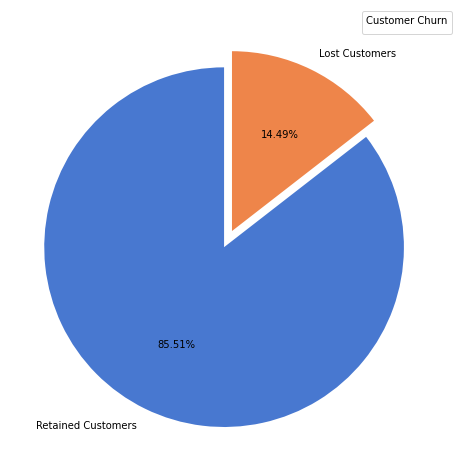

In [11]:
# Plotting Churn rate
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
churn_group = churn_data.groupby("Churn")

plt.legend(title="Customer Churn", labels=["Retained Customers", "Lost Customers"])
plt.pie(churn_group["Churn"].count(), labels=["Retained Customers", "Lost Customers"], startangle=90,
        colors=colors, autopct='%.2f%%',
        explode=[0.1, 0.0]);



1.   As we can see from the groupby funcntion and the Pie Chart above, the telecom operator has lost nearly 14.50% of it's subscribers during the period.
2.   Churn rate of 14.50% is considered high in the industry as it nearly costs 7 times as much to acquire a new customer when compared to retaining an existing one.  

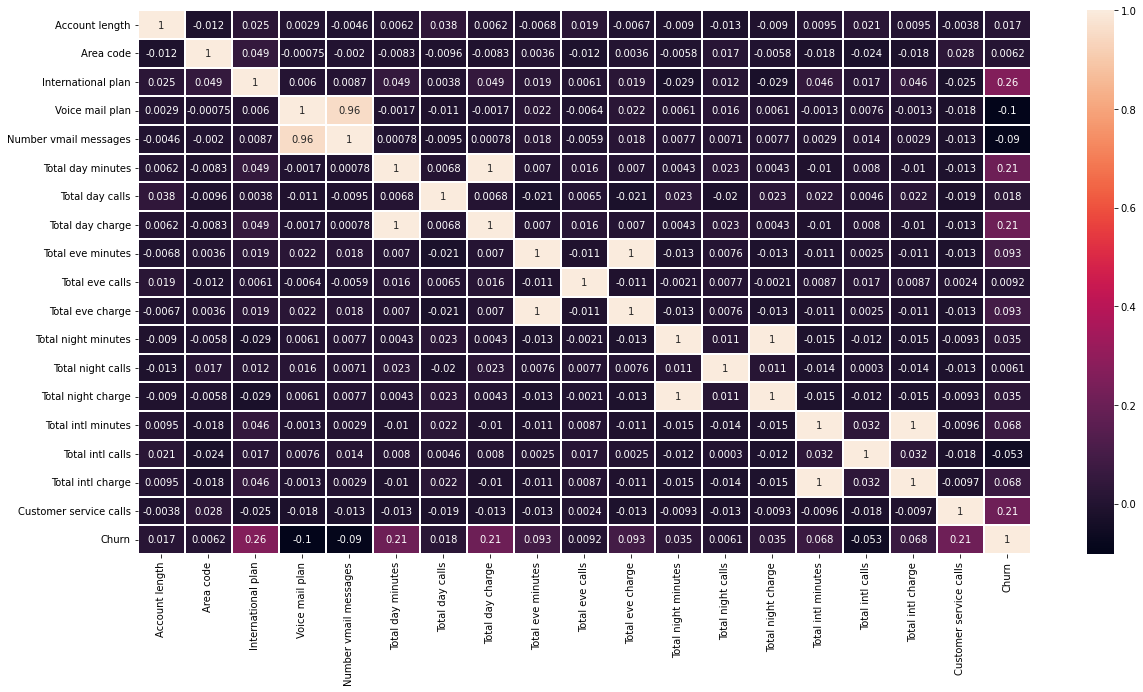

In [12]:
# Converting International plan and Voice mail plan to o and 1 for No and Yes values.
churn_data["International plan"] = np.where(churn_data["International plan"] == "Yes", 1, 0)
churn_data["Voice mail plan"] = np.where(churn_data["Voice mail plan"] == "Yes", 1, 0)

# Checking the correlation between the datacolums to identify the primary features contributing most to the churn.
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(churn_data.corr(), annot=True, linewidths=2);


<h1><b>Correlation of churn with diffrent features in the dataset<b></h1>


1.   Churn has strong positive correlation with International plan, Total day minutes, Total day Charges and customer service calls when compared to other features.
2. Account length, also shows some positive correalation but relationship is not that strong when compared to the features mentioned in the first point.
3. Voice mail features show a very small negetive correlation with the dataset.
4. Other columns have very negligible effect on churn and therefore, are not analysed in depth.
5. Columns with strongest correlation are worth analysing before looking into other features.



In [13]:
cols_pos_corr = ["Account length", "International plan", "Total day minutes", "Total day charge", "Customer service calls", "Churn"]
cols_neg_corr = ["Voice mail plan", "Number vmail messages", "Churn"]

In [14]:
# looking at columns with positive correlation
churn_data[cols_pos_corr].head(5)

,Account length,International plan,Total day minutes,Total day charge,Customer service calls,Churn
0,128,0,265.10000,45.07000,1,False
1,107,0,161.60000,27.47000,1,False
2,137,0,243.40000,41.38000,0,False
3,84,1,299.40000,50.90000,2,False
4,75,1,166.70000,28.34000,3,False


Churn
False    100
True     103
Name: Account length, dtype: int64 




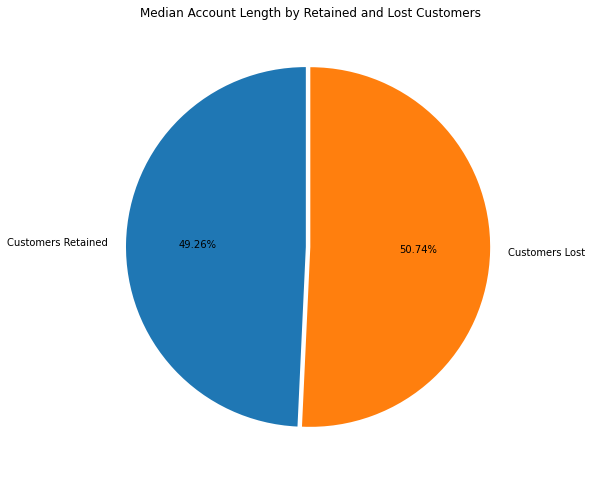

In [15]:
# Examining the Churn in relation to the account length.

print(churn_group["Account length"].median(), "\n\n")
plt.title("Median Account Length by Retained and Lost Customers")
plt.pie(churn_group["Account length"].median(), autopct="%.2f%%", labels=["Customers Retained", "Customers Lost"], startangle=90, explode=[0.025,0]);

Churn
False   100.79368
True    102.66460
Name: Account length, dtype: float64 




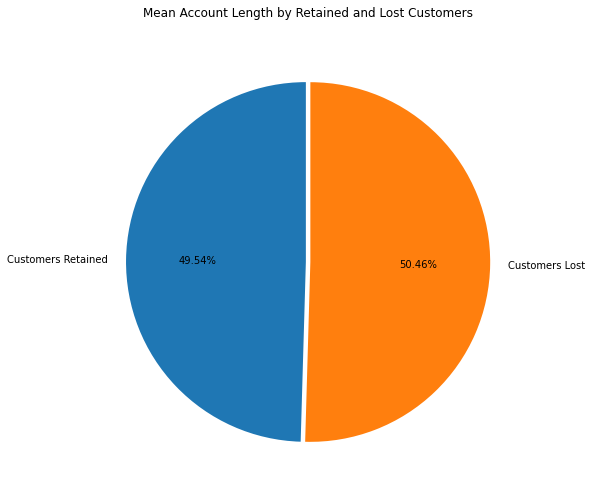

In [16]:
print(churn_group["Account length"].mean(), "\n\n")
plt.title("Mean Account Length by Retained and Lost Customers \n")
plt.pie(churn_group["Account length"].mean(), autopct="%.2f%%", labels=["Customers Retained", "Customers Lost"], startangle=90, explode=[0.025,0]);

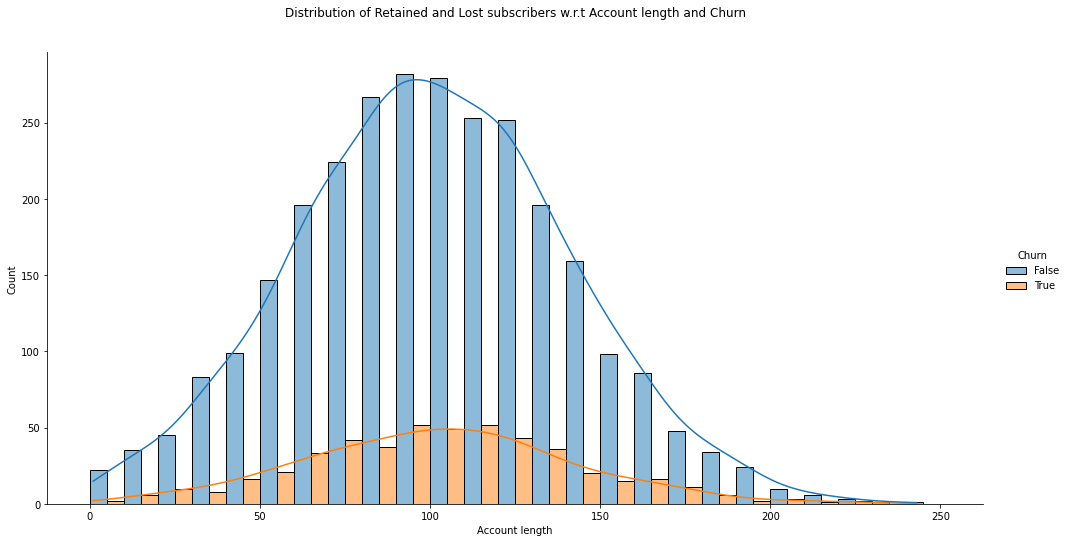

In [17]:
# distribution of Subscribers as per account length
#Change the height parameter to suit your screen size and resolution

g = sns.displot(churn_data, x="Account length", hue="Churn", multiple="dodge", kde=True, height=7, aspect=2,
            bins=[i for i in range(0,251,10)]).set(title="Distribution of Retained and Lost subscribers w.r.t Account length and Churn\n\n");

<h1><b>Churn wih respect to Account length</b></h1>

1.    Median account length for subscribers who have left and who continue to use the services of the operator is 103 and 100.

2. Mean account length for subscribers who have left and who continue to use the services of the operator is 102.67 and 100.80.

3. There mean and median are very close and thus the account lenghth is very evenly distributed between churned and retained customers.

4. Most subscribers leave around 100 days of account length.

5. Subscribers who are using the services for around 70-140 days are most prone to churn.


In [18]:
# Examining the data w.r.t. International plan

Int_plan_cust = pd.DataFrame(churn_group["International plan"].value_counts()).unstack()

In [19]:
Int_plan_cust.columns = Int_plan_cust.columns.droplevel()

In [20]:
# Distribution of subscribers who have international plan by Churn

Int_plan_cust

International plan,0,1
Churn,,
False,2664,186
True,346,137


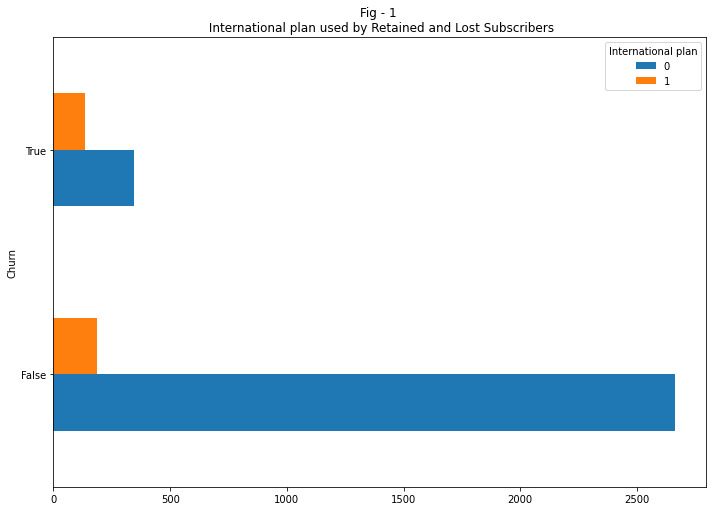

In [21]:
fig = Int_plan_cust.plot(kind="barh")
fig.set_title("Fig - 1 \n International plan used by Retained and Lost Subscribers");

In [22]:
# Median and mean Inetrnational charge by Churn
print("----Median----")
print(churn_group["Total intl charge"].median())
print("\n\n")
print("----Mean----")
print(churn_group["Total intl charge"].mean())

----Median----
Churn
False   2.75000
True    2.86000
Name: Total intl charge, dtype: float64



----Mean----
Churn
False   2.74340
True    2.88954
Name: Total intl charge, dtype: float64


In [23]:
# Median and mean International calls by Churn
print("----Median----")
print(churn_group["Total intl calls"].median())
print("\n\n")
print("----Mean----")
print(churn_group["Total intl calls"].mean())

----Median----
Churn
False    4
True     4
Name: Total intl calls, dtype: int64



----Mean----
Churn
False   4.53298
True    4.16356
Name: Total intl calls, dtype: float64


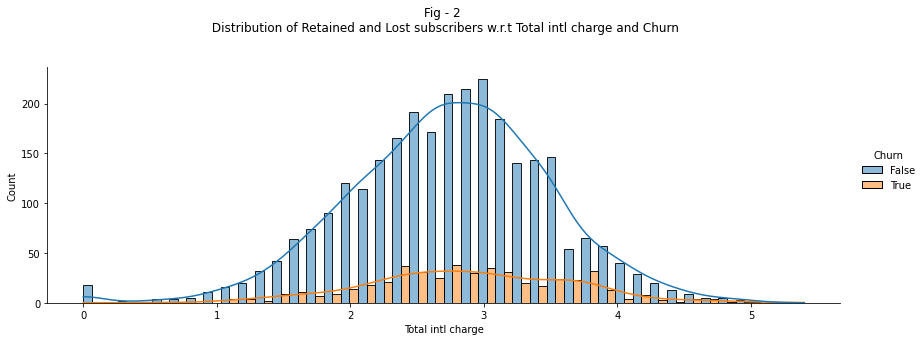

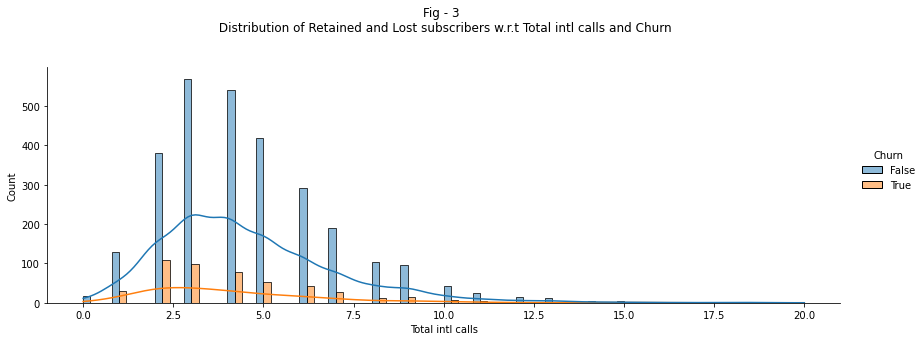

In [24]:
# plotting the distribution of customers w.r.t. to Charges and Numbers of International calls and Churn

sns.displot(churn_data, x="Total intl charge", hue="Churn", multiple="dodge", kde=True, height=4, aspect=3).set(title="Fig - 2 \n Distribution of Retained and Lost subscribers w.r.t Total intl charge and Churn\n\n");
sns.displot(churn_data, x="Total intl calls", hue="Churn", multiple="dodge", kde=True, height=4, aspect=3).set(title="Fig - 3 \n Distribution of Retained and Lost subscribers w.r.t Total intl calls and Churn\n\n");

In [25]:

churn_data.loc[(churn_data["International plan"] == 0) & (churn_data["Total intl charge"] > 0)]["Churn"].value_counts()

False    2646
True      346
Name: Churn, dtype: int64

In [26]:
# Table view of the Charges w.r.t. to the Churn and International plan

intl_df = pd.DataFrame(churn_data.groupby(["International plan", "Churn"])["Total intl charge"].mean()).unstack()
intl_df


Total intl charge        
Churn                          False   True 
International plan                          
0                            2.75059 2.77402
1                            2.64054 3.18131

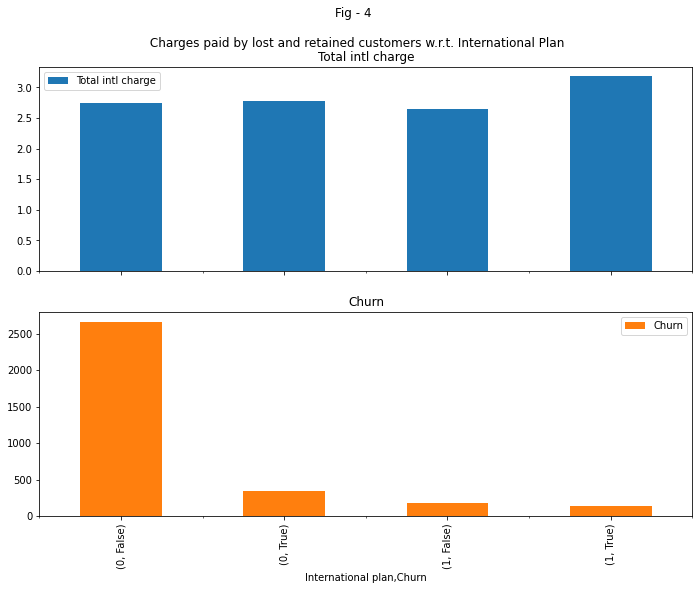

In [27]:
#plotting charges paid and number of customers w.r.t. the churn and international plan
pd.DataFrame(churn_data.groupby(["International plan", "Churn"]).agg({"Total intl charge":'mean', "Churn":'count'})).plot(kind="bar", subplots=True, 
                                                                                                                          title="Fig - 4 \n\n Charges paid by lost and retained customers w.r.t. International Plan");

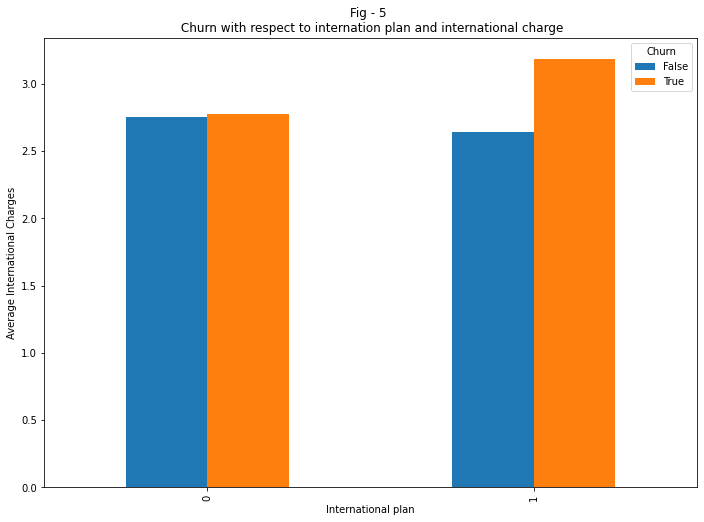

In [28]:
intl_df.plot(kind="bar", y = "Total intl charge", ylabel="Average International Charges", title="Fig - 5 \n Churn with respect to internation plan and international charge");

<h1><b>Churn with respect to International calls</b></h1>


1.  Out of total 483 subscribers who left 137 or 28.36% had an international plan, represented by fig 1.
2.   Median and mean values for total internation charge is around 2.75 for retained customers and around 2.86-2.87 for lost customers.
3. Median and Mean values for Total international calls is around 4 - 4.50 for retained customers and 4 - 4.20 for lost customers.
4. There are 2992 cutomers who have called internationally and do not have an international plan, out of those 346 or 11.60% have left the operators services.
5. There are 323 customers with an international plan. Out of those 137 or 42.41% have left the operators services.
6. Subscribers with international calls between 2-5 and international charge between 2-4 are most prone to churn, which is clearly visible in fig 2 and 3.
7. Subscribers who left the operator were paying more for international calls than who were retained by the operator (Fig - 4, last bar).
8. Subscribers with international plan who left were paying more on an average than subscribers who dont have an international plan (fig - 4 and 5).

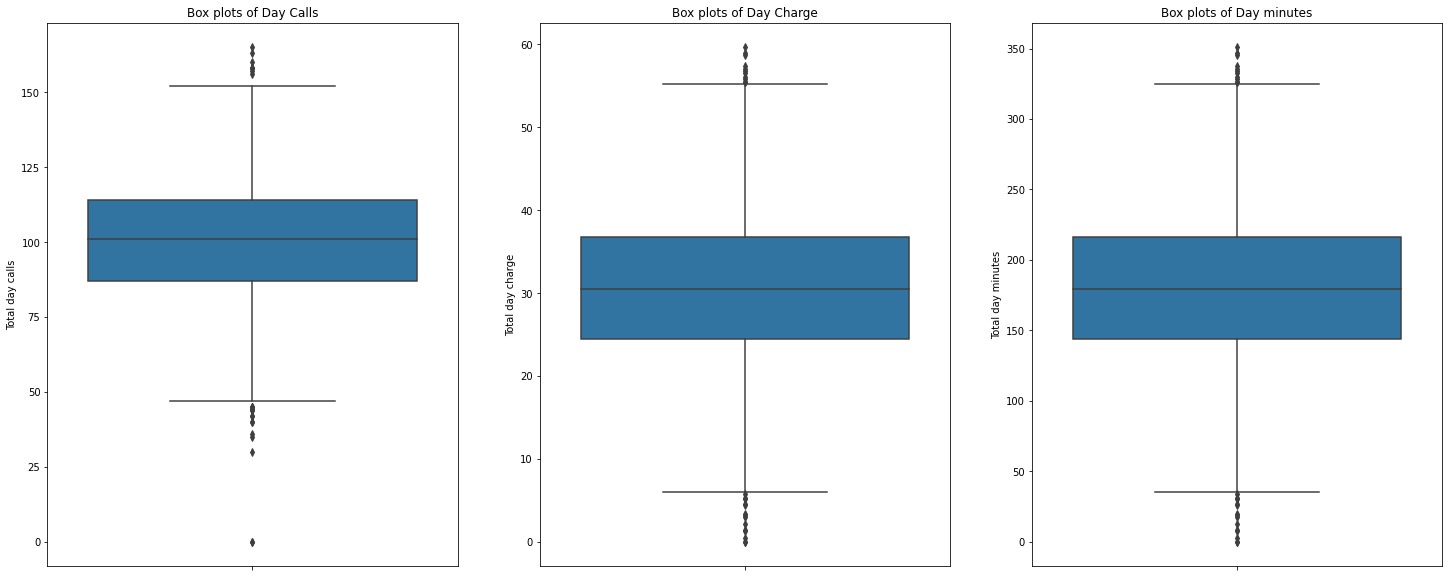

In [29]:
# Examining the data w.r.t. Total day charges and Total day calls and total day minutes
# looking at the data
fig, axs = plt.subplots(1,3, figsize = (25,10))
axs[0].set(title = "Box plots of Day Calls")
axs[1].set(title = "Box plots of Day Charge")
axs[2].set(title = "Box plots of Day minutes")
sns.boxplot(data = churn_data, y="Total day calls", ax=axs[0]);
sns.boxplot(data = churn_data, y="Total day charge", ax=axs[1]);
sns.boxplot(data = churn_data, y="Total day minutes", ax=axs[2]);

In [39]:
# Mean of all three variables

day_df = pd.DataFrame(churn_group.agg({"Total day calls":"mean", "Total day minutes":"mean", "Total day charge":"mean"}))
print("    ----------------------MEAN TABLE-------------------------")
day_df

    ----------------------MEAN TABLE-------------------------


,Total day calls,Total day minutes,Total day charge
Churn,,,
False,100.28316,175.17575,29.78042
True,101.33540,206.91408,35.17592


In [31]:
# run to install latest matplot lib / annotations dont work with containers in older versions
# !pip install matplotlib==3.4.2

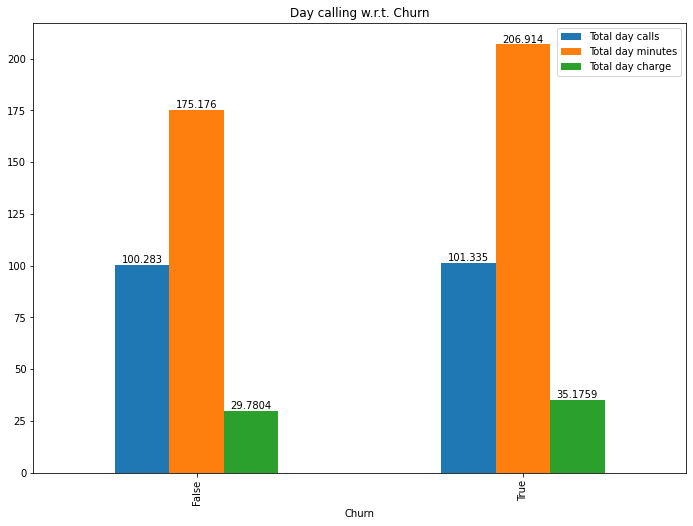

In [41]:
# Plotting average of calls, minutes and charges during day for the dataset

ax = day_df.plot(kind='bar');
ax.set_title("Day calling w.r.t. Churn")
for container in ax.containers:
    ax.bar_label(container)
  

<h1><b>Churn with respect to day calling</b></h1>


1.   Box plots and the mean table show that there are more than a few outliers when it comes to calls, minutes and charges during the day. The median values for day calling and mean values for day calling are very close suggesting that the outliers are not affecting the mean very much.
2.   From the plot above it is clear that the customer who left the operator's services are calling for longer duration during the day than customers who continue to use the services(Total day minutes).
3. Although the average number of calls is same in both True and False categories for the churn the average duration of calls is longer for the churned customers.
4. Average charge paid by churned customer for day calls is also on the higher side.
5. The observations suggests that the tariff of operator for day calls is on the higher side during the day when compared to its competetors.

